# Analyzing Customer Shopping Data using Machine Learning



In this project, I will use a dataset found on [Kaggle.com](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset) [1] to analyse customer shopping trends and build a model to perfrom customer segmentation.

The dataset used analysis the shopping patterns of customers in 10 shopping malls in Istanbul between 2021 and 2023.

Information on the attributes:
      
  *   invoice_no: Represents the invoice number. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each row.

  *   customer_id: Represents the customer number. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each row.

  *   gender: Represents customer's gender. (String)

  *   age: Represents the customer's age. (Integer)

  *   category: Represents the category of the purchased product. (String)

  *   quantity: Represents the quantities of each product per transaction. (Integer)

  *   price: Represents the unit price in Turkish Liras. (Float)

  *   payment_method: Represents the payment method (cash, credit card or debit card) used for the transaction.

  *   invoice_date: Represents the invoice date, which is the day when a transaction was generated.

  *   shopping_mall: Represents the name of the shopping mall where the transaction was made. (String)

## Understanding the Data

In [1]:
from google.colab import files

uploaded_file = files.upload()

Saving customer_shopping_data.csv to customer_shopping_data.csv


In [2]:
import pandas as pd

df = pd.read_csv("customer_shopping_data.csv")

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

There are no duplicated or null values in the dataset.

In [7]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [8]:
df.shape

(99457, 10)

Some initial observations:

1. The dataset contains 99457 rows and 10 columns.

2. The dataset contains no duplicated values.

3. The dataset contains many data types, including two integer columns,a float column, and object columns.

4. Generally, the data values shown mostly make sense given the context.





---



## Data Preprocessing

In [9]:
# Extracting relevant columns
df = df[['gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall']].copy()
df

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [10]:
# Renaming columns
df = df.rename({'gender': 'Gender', 'age': 'Age', 'category': 'Category', 'quantity': 'Quantity', 'price': 'Price', 'payment_method': 'Payment Method', 'invoice_date' : 'Invoice Date', 'shopping_mall': 'Shopping Mall'}, axis=1).copy()
df

,Gender,Age,Category,Quantity,Price,Payment Method,Invoice Date,Shopping Mall
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


## Data Analysis

### Univariate Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

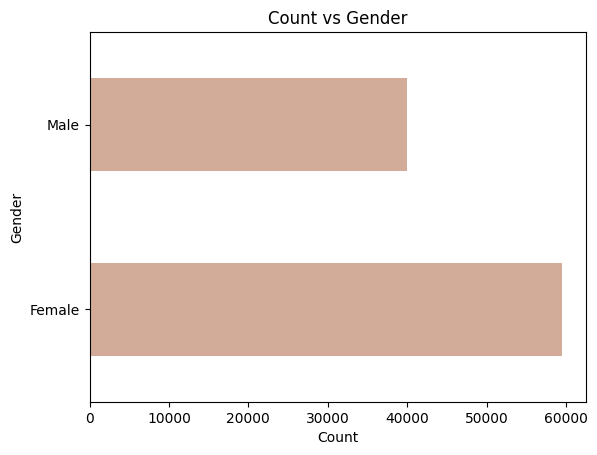

In [12]:
ax = df['Gender'].value_counts().plot(kind='barh', color='#D2AB99', title='Count vs Gender')
ax.set_xlabel('Count')
ax.set_ylabel('Gender')
plt.show()

Most customers were female.

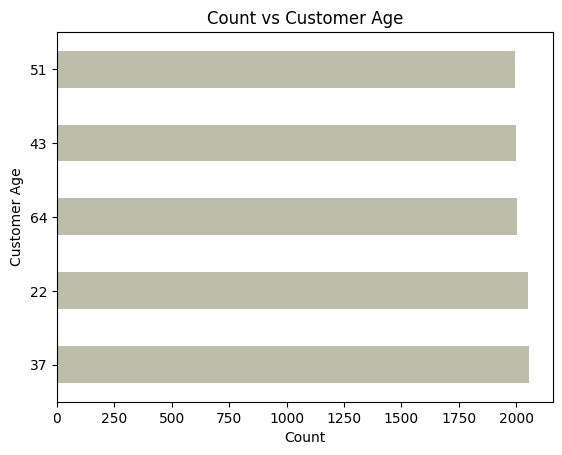

In [13]:
ax =df['Age'].value_counts().head(5).plot(kind='barh', color='#BDBEA9', title= 'Count vs Customer Age')
ax.set_xlabel('Count')
ax.set_ylabel('Customer Age')
plt.show()

Most customers were 37 years of age.

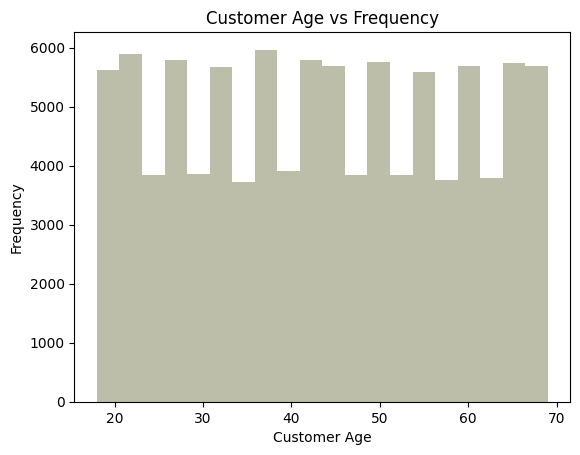

In [14]:
ax = df['Age'].plot(kind='hist', bins=20, color='#BDBEA9', title='Customer Age vs Frequency')
ax.set_xlabel('Customer Age')
plt.show()

The customer age data is relatively evenly distributed, which indicates that there is no target age group.

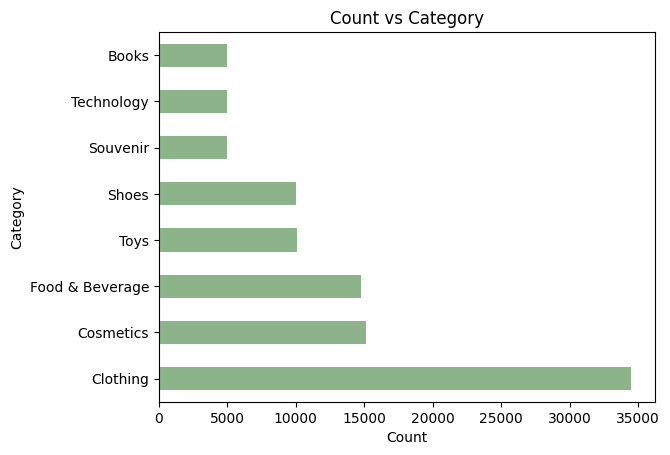

In [15]:
ax = df['Category'].value_counts().plot(kind='barh', color='#8DB38B', title='Count vs Category')
ax.set_xlabel('Count')
ax.set_ylabel('Category')
plt.show()

The majority of customers bought clothing, followed by cosmetics and food & beverages.

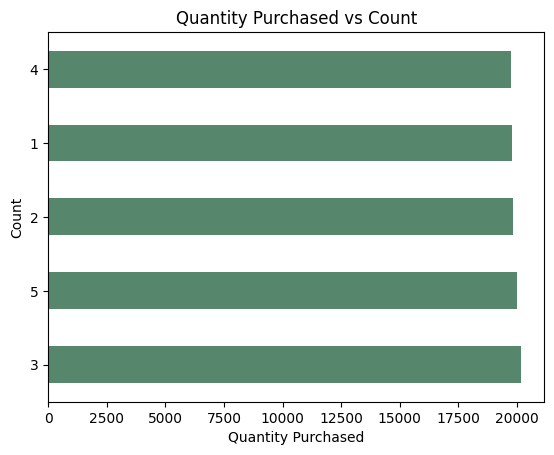

In [16]:
ax = df['Quantity'].value_counts().head(5).plot(kind='barh', color='#56876D', title='Quantity Purchased vs Count')
ax.set_xlabel('Quantity Purchased')
ax.set_ylabel('Count')
plt.show()

Most customers purchased three items.

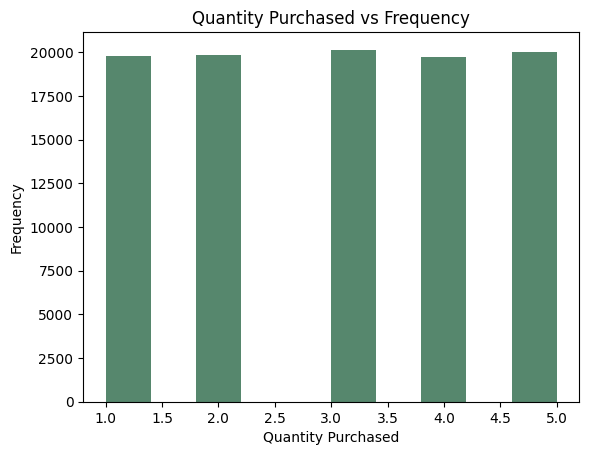

In [17]:
ax = df['Quantity'].plot(kind='hist', color='#56876D', title='Quantity Purchased vs Frequency')
ax.set_xlabel('Quantity Purchased')
plt.show()

This shows that the distribution of customers purchasing 1 to 5 items is approximately uniform.

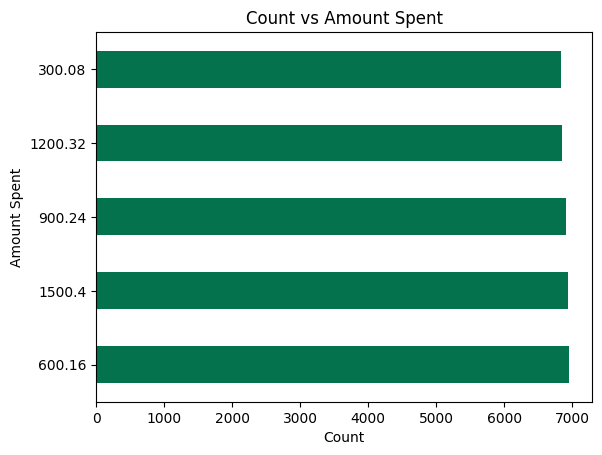

In [18]:
ax = df['Price'].value_counts().head(5).plot(kind='barh', color='#04724D', title='Count vs Amount Spent')
ax.set_xlabel('Count')
ax.set_ylabel('Amount Spent')
plt.show()

Most customers spent 600.16 Turkish Lira.

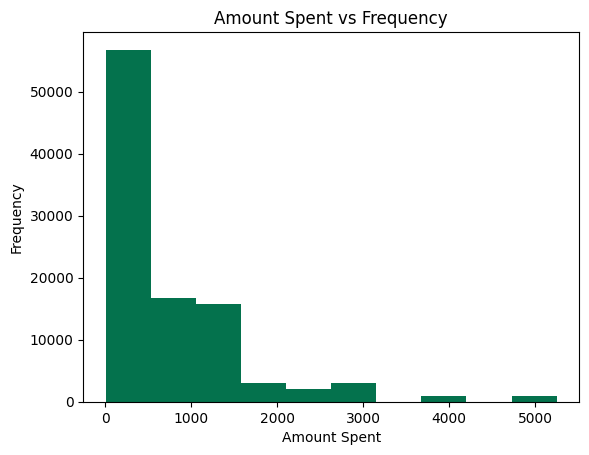

In [19]:
ax = df['Price'].plot(kind='hist', bins=10, color='#04724D', title='Amount Spent vs Frequency')
ax.set_xlabel('Amount Spent')
plt.show()

We can see here that most customers (over 50,000 people) spent less than 500  Turkish Lira. The number of customers spending over 500 decreases sharply and very few spent customers over 1500 Turkish Lira.

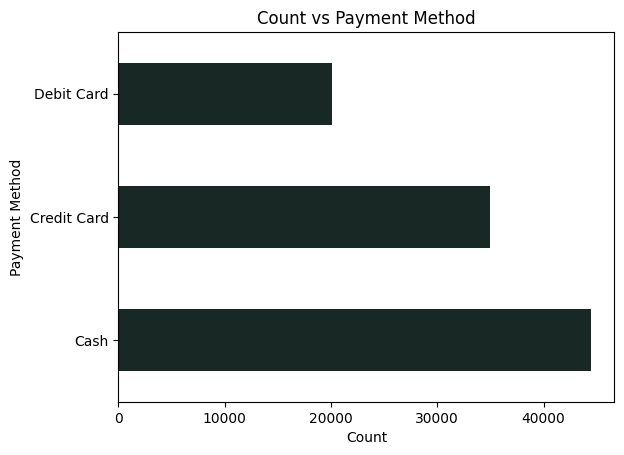

In [20]:
ax = df['Payment Method'].value_counts().plot(kind='barh', color='#182825', title='Count vs Payment Method')
ax.set_xlabel('Count')
ax.set_ylabel('Payment Method')
plt.show()

Most customers paid in cash.

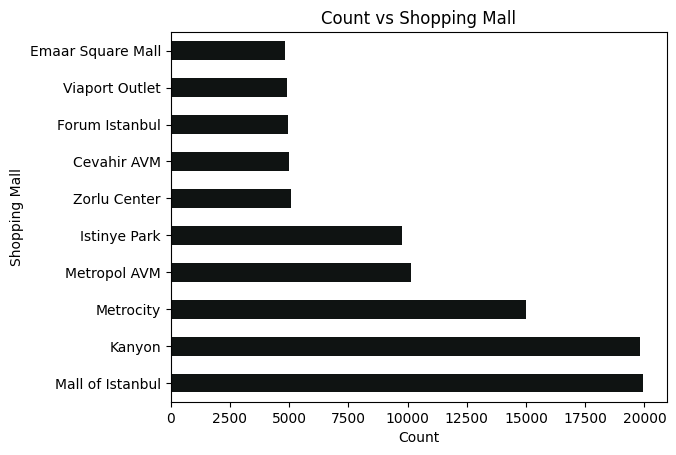

In [21]:
ax = df['Shopping Mall'].value_counts().plot(kind='barh', color='#0F1312', title='Count vs Shopping Mall')
ax.set_xlabel('Count')
ax.set_ylabel('Shopping Mall')
plt.show()

The Mall of Istanbul appears to be the most popular mall in Istanbul.

### Bivariate & Multivariate Analysis

<ipython-input-22-2c62aab3de93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated_df = df.corr()


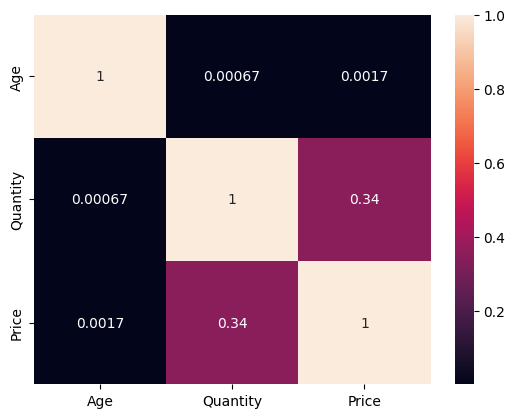

In [22]:
# Correlation Heatmap
correlated_df = df.corr()
heatmap = sns.heatmap(correlated_df, annot=True)
plt.show()

There does not appear to be any correlation (linear relationships) between the different numeric columns.

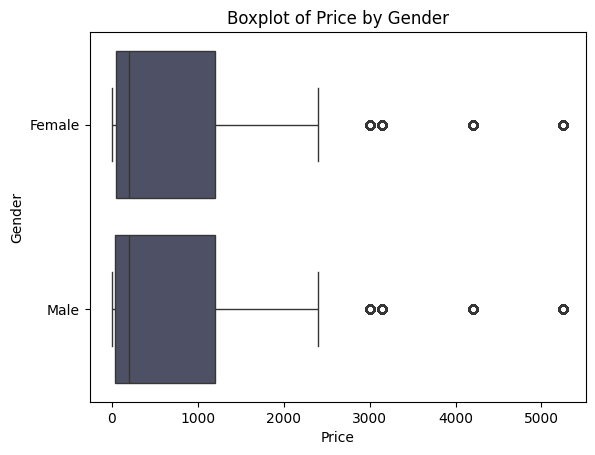

In [23]:
sns.boxplot(x='Price', y='Gender', data=df, color='#4A4E69')
plt.title('Boxplot of Price by Gender')
plt.show()

The spending habits of male and female customers were roughly the same as indicated by the median values of the boxplots. It is safe to assume that marketing strategies may not need to differentiate between genders in terms of spending behavior.

Furthermore, customers that spent 2500 Turkish Lira or above were considered to be outliers.

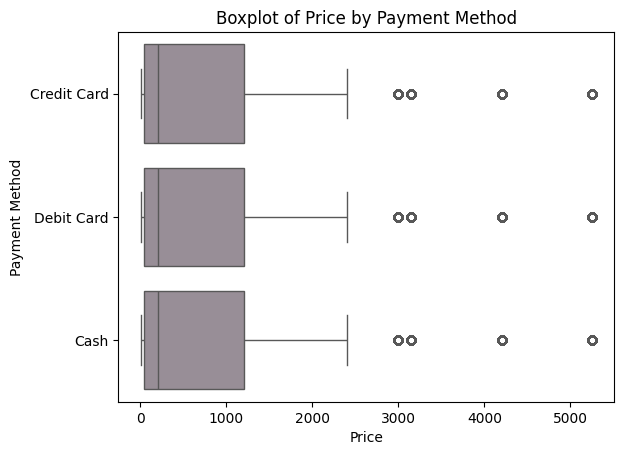

In [24]:
sns.boxplot(x='Price', y='Payment Method', data=df, color='#9A8C98')
plt.title('Boxplot of Price by Payment Method')
plt.show()

The boxplot shows that the median payment amount is comparable across different payment methods, suggesting no particular payment method is associated with significantly higher or lower spending.

Furthermore, customers that spent 2500 Turkish Lira or above were considered to be outliers.

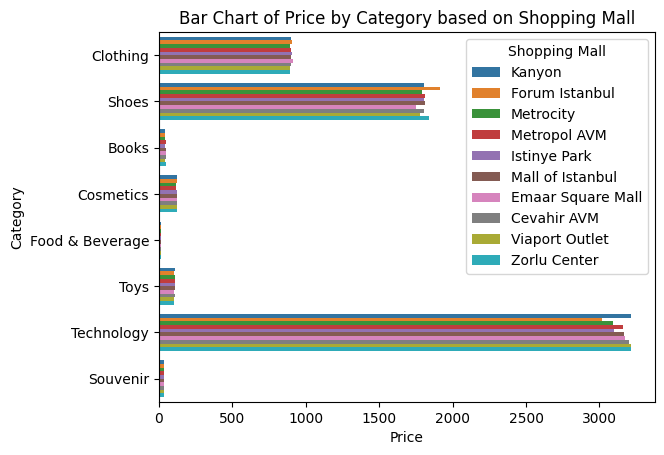

In [25]:
sns.barplot(x='Price', y='Category', hue='Shopping Mall', errorbar=None, data=df)
plt.title('Bar Chart of Price by Category based on Shopping Mall')
plt.show()

Interestingly enough, despite the fact that the 'Count vs Category' graph shown in the Univariate Analysis section showed that Technology was not bought much, this graph shows that it had by far the most amount of money spent on it.



Technology, Shoes, and Clothing were the three most profitable categories at these malls. These could be viewed as opportunities to further increase demand by pushing strong marketing strategies in these categories.



"Forum Istanbul" noticeably leads in shoe sales, but lags behind in technology sales. This could act as an area of potential growth for the mall.

In [26]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

df['Purchase Year'] = df['Invoice Date'].dt.year

<ipython-input-26-b7a5a5d5115f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])


In [27]:
df

,Gender,Age,Category,Quantity,Price,Payment Method,Invoice Date,Shopping Mall,Purchase Year
0,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,2022
1,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021
2,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,2021
3,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021
4,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021
...,...,...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022
99453,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021
99454,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021
99455,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,2021


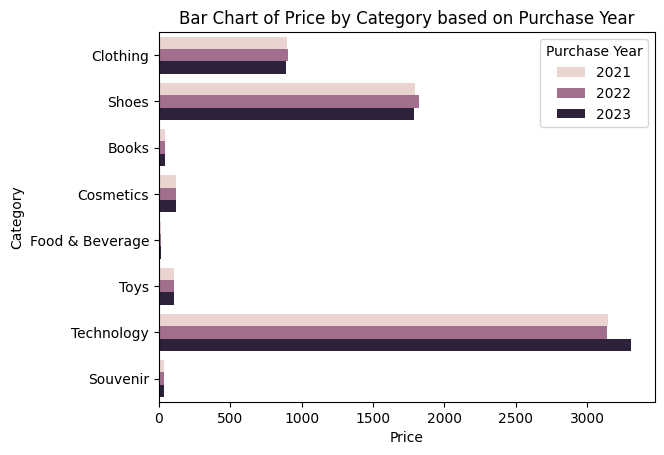

In [28]:
sns.barplot(x='Price', y='Category', hue='Purchase Year', errorbar=None, data=df)
plt.title('Bar Chart of Price by Category based on Purchase Year')
plt.show()

This graph shows us that 2023 had a spike in sales in the Technology category compared to 2021 and 2022, but had reduced sales in shoes and clothing.

The data above suggests that Technology was the highest selling category across all the malls, particularly in 2023.

Perhaps Technology sales and marketing should be a focus point of Forum Istanbul in the future, as it seems to be lacking behind the other malls in what could prove to be a ludicrous sector.

As for the other malls, they should maintain their focus on Technology through their marketing strategies, as this sector has proven to be successful thus far. Continuing to innovate and invest in this area could help sustain their current strong performance and possibly achieve further growth. This is further backed by the lack of sales in this department, as shown in the "Count vs Category" graph in the "Univariate Analysis" part of this project.

Despite being one of the less popular categories, Technology accounted for the highest expenditure, indicating a smaller yet more financially significant customer base and the potential for extremely high profits for the malls.

## Model Creation

In [29]:
from sklearn.cluster import KMeans

In [30]:
# Clustering Features
cluster_df = df[['Quantity','Price']].copy()
cluster_df

,Quantity,Price
0,5,1500.40
1,3,1800.51
2,1,300.08
3,5,3000.85
4,4,60.60
...,...,...
99452,5,58.65
99453,2,10.46
99454,2,10.46
99455,4,4200.00


I will segment the data based on Price and Quantity.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

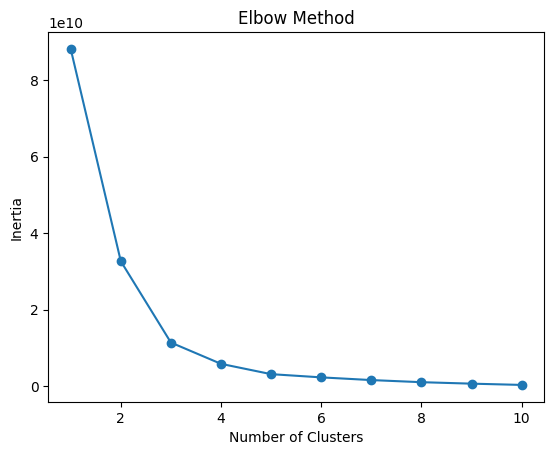

In [31]:
# Find optimal K value using Elbow Method
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster_df[['Price', 'Quantity']])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The optimal K value is 2.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


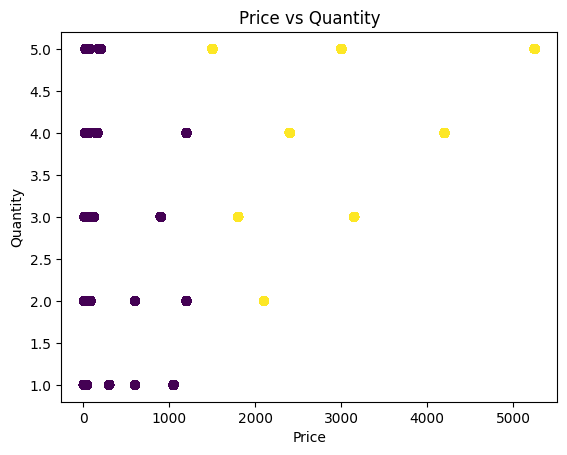

In [32]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster_df[['Price', 'Quantity']])

plt.scatter(cluster_df['Price'], cluster_df['Quantity'], c=kmeans.labels_)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity')
plt.show()

In [33]:
centroids = kmeans.cluster_centers_
centroids

array([[ 350.30958635,    2.73817926],
       [2333.75424276,    4.29036244]])

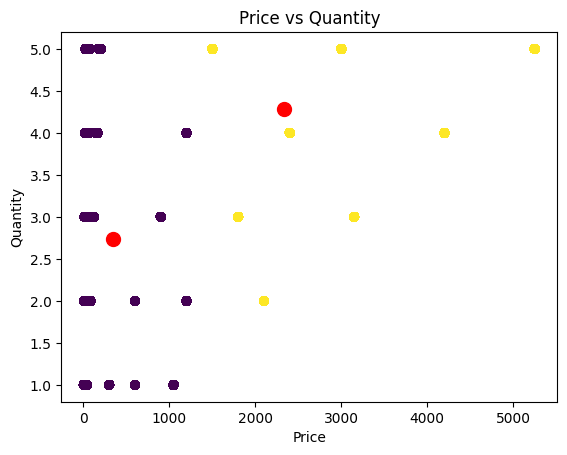

In [34]:
plt.scatter(cluster_df['Price'], cluster_df['Quantity'], c=kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity')
plt.show()

The centroids are represented by the red points.

The left centroid represents the group of customers who buy mutiple items for a low price.

The right centroid represents the group of customers who buy a large number of items for a high price.

#Model Evaluation

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
silhouette_score(cluster_df[['Price', 'Quantity']], kmeans.labels_)

0.6944559241505106

A Silhouette Score of 0.69 implies that the clusters were well-seperated and implies a good distinction between the clusters.

## Results

The two centroids above represent two types of customer groups:

1. Customers who buy mutiple items for a low price.

2. Customers who buy a large number of items for a high price.


The first group includes customers who care about getting the best value out of their money, whereas the second group includes customers who do not mind paying a premium price for items.

A possible marketing strategy for the first group could be to create bundle deals (E.g. 2-for-1 deals), as well as discounts or promotions.

A possible marketing strategy for the second group could be a focus on exclusivity and quality on items.

The first group might require more competitive pricing strategies, whereas the second group could be attracted using premium pricing strategies.

## References

[1] Customer Shopping Dataset: https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset